<a href="https://colab.research.google.com/github/cristianzapata/NLP-Amazon-Reviews/blob/main/amazonNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#como es usual se exportan las librerias necesarias

import pandas as pd
import numpy as np
#plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
#tokenizacion
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
#BOW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#Clasificacion
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from nltk import download
download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#Information readding
data=pd.read_csv("/content/all_kindle_review .csv")


## EDA

In [4]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [5]:
#data identification
data.head(5)

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [6]:
# PLotting Rating using ploty
rating_count=data.rating.value_counts()
fig = go.Figure([go.Bar(x=rating_count.index, y=rating_count.values,text=rating_count.values)])
fig.update_layout(title='Distribucion de calificacion usando ploty')
fig.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         11998 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [8]:
df = pd.DataFrame({'review': ["I love this Kindle!", "This book is terrible.", ...]})

In [9]:
data[["reviewText", "rating"]]

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4
...,...,...
11995,Valentine cupid is a vampire- Jena and Ian ano...,4
11996,I have read all seven books in this series. Ap...,5
11997,This book really just wasn't my cuppa. The si...,3
11998,"tried to use it to charge my kindle, it didn't...",1


In [10]:
# funcion de pre.prosesamiento de texto
def preprocess_text(text):
  text = re.sub(r'<.*?>', '', text)  # se Remueven las etiquetas HTML
  text = re.sub(r'[^a-zA-Z\s]', '', text) # Se remueven caracteres no numericos
  text = text.lower() # se combierten a minusculas
  words = text.split() # Tokenizacion
  words = [word for word in words if word not in stopwords.words('english')]
  return ' '.join(words)   #se Remeuven stopwords

In [11]:
#aplicacionde pre-prosesamiento
data['cleaned_review'] = data['reviewText'].apply(preprocess_text)


In [12]:
dato = data.loc[0, 'cleaned_review']
print(dato)

jace rankin may short hes nothing mess man hauled saloon undertaker knows hes famous bounty hunter oregon shot man saloon finished years long quest avenge sisters murder trying figure next snottynosed farm boy rescued gang bullies offers money kill man forced ranch reluctantly agrees bring man justice kill outright first needs tell sisters widower newskyla kyle springer bailey riding trails sleeping ground past month trying find jace wants revenge man killed husband took ranch amongst crimes shes keen detour jace wants take realizes shes options hides behind boy persona best tries keep pace confrontation along way gets shot jace discovers kyles kyla come clean whole reason needs scoundrel dead hope hell still help herthe book share touching moments slowblooming romance kyla find good reason fear men hide behind boys persona watching jace slowly pull shell help conquer fears endearing pain real deeplyrooted didnt disappear face sexiness neither understandable aversion marriage magically

In [13]:
data[["cleaned_review", "rating"]]

,cleaned_review,rating
0,jace rankin may short hes nothing mess man hau...,3
1,great short read didnt want put read one sitti...,5
2,ill start saying first four books wasnt expect...,3
3,aggie angela lansbury carries pocketbooks inst...,3
4,expect type book library pleased find price right,4
...,...,...
11995,valentine cupid vampire jena ian another vampi...,4
11996,read seven books series apocalypticadventure o...,5
11997,book really wasnt cuppa situation man capturin...,3
11998,tried use charge kindle didnt even register ch...,1


# Asignacion de niveles de sentimiento
Para simplificar, asignaremos etiquetas de sentimiento según la columna de calificación: calificaciones de 4 y 5 como positivas, y calificaciones de 1, 2 y 3 como negativas.

In [14]:
# Assign sentiment labels
data['sentiment'] = data['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Display the first few rows of the dataset with sentiment labels
print(data[['reviewText', 'cleaned_review', 'rating', 'sentiment']].head())

                                          reviewText  \
0  Jace Rankin may be short, but he's nothing to ...   
1  Great short read.  I didn't want to put it dow...   
2  I'll start by saying this is the first of four...   
3  Aggie is Angela Lansbury who carries pocketboo...   
4  I did not expect this type of book to be in li...   

                                      cleaned_review  rating  sentiment  
0  jace rankin may short hes nothing mess man hau...       3          0  
1  great short read didnt want put read one sitti...       5          1  
2  ill start saying first four books wasnt expect...       3          0  
3  aggie angela lansbury carries pocketbooks inst...       3          0  
4  expect type book library pleased find price right       4          1  


In [15]:
# PLotting Rating using ploty
conteo = data.sentiment.value_counts()
fig = go.Figure([go.Bar(x=conteo.index, y=conteo.values,text=conteo.values)])
fig.update_layout(title='Distribucion de rating')
fig.show()

# Division de datos

In [16]:
from sklearn.model_selection import train_test_split

# Division de datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorizacion de Texto
se Convertierte el texto en una representación numérica expresada en un formato matrisial. Opciones comunes:

**Bag of Words (BoW)**
Este modelo aprende el vocabulario a partir de los datos de entrenamiento (X_train) y Convierte cada texto en X_train a un vector basado en la frecuencia de palabras según el vocabulario aprendido, y finalmente convierte los textos de prueba (X_test) a vectores BoW usando el mismo vocabulario que se aprendió del conjunto de entrenamiento (X_train)

In [17]:
# Vectorize the text using BoW
#CountVectorizer es una clase de scikit-learn que implementa el modelo BoW
vectorizer = CountVectorizer()
#aprende el vocabulario a partir de los datos de entrenamiento (X_train)
#conversion a vecotres BOW
X_train_bow = vectorizer.fit_transform(X_train)
#convierte los textos de prueba (X_test) a vectores BoW usando el mismo vocabulario que se aprendió del conjunto de entrenamiento (X_train)
X_test_bow = vectorizer.transform(X_test)



In [18]:
print(X_train_bow)


  (0, 20081)	1
  (0, 13099)	1
  (0, 3777)	3
  (0, 4866)	1
  (0, 9713)	1
  (0, 31875)	1
  (0, 11361)	1
  (0, 24650)	1
  (0, 18764)	1
  (0, 10292)	1
  (0, 31080)	1
  (0, 278)	1
  (0, 22318)	1
  (0, 1848)	1
  (0, 13030)	2
  (0, 20616)	1
  (0, 32727)	2
  (0, 14982)	2
  (0, 12849)	1
  (0, 8994)	1
  (0, 19696)	1
  (0, 37342)	1
  (0, 4077)	1
  (0, 29334)	1
  (0, 34516)	1
  :	:
  (9599, 33144)	2
  (9599, 27770)	1
  (9599, 3642)	1
  (9599, 9971)	1
  (9599, 535)	1
  (9599, 26128)	2
  (9599, 34724)	1
  (9599, 2958)	1
  (9599, 8645)	10
  (9599, 33580)	1
  (9599, 9974)	1
  (9599, 9973)	1
  (9599, 11423)	1
  (9599, 28473)	1
  (9599, 3544)	1
  (9599, 37762)	1
  (9599, 8646)	1
  (9599, 5561)	1
  (9599, 10796)	1
  (9599, 15728)	1
  (9599, 32601)	1
  (9599, 12389)	1
  (9599, 10032)	1
  (9599, 24145)	1
  (9599, 31680)	1


A modo de verificacion se puede implementar lo siguiente:

In [19]:

# imprime la fila
print(X_train.iloc[0])
# se Obitene el vocabulario completo
vocabulario = vectorizer.get_feature_names_out()
#se indica la palabra
palabra = vectorizer.get_feature_names_out()[20081]
# se Imprime la palabra
print(palabra)

looking forward book came double space every paragraph kindle edition since action moves around formatting makes story hard follow die hard like want botherits sad thing good book spoiled formatting fault author story good book energy read itive also emailed author
looking


# Clasificacion modelo Naive Bayes
ste un buen modelo de clasificacion para valores discreetos como conteos o frecuencia de una palabra el cual puede implementarse para modelos  BoW o Tf-IDF

In [20]:
# entrenamiento con Naive Bayes classifier
#
model_bow = MultinomialNB()
#Calcula las probabilidades a priori de cada clase (frecuencia relativa de las etiquetas).
#Calcula las probabilidades condicionales de cada palabra dada una clase, es decir, la probabilidad
#de que una palabra aparezca en documentos de una clase específica.
model_bow.fit(X_train_bow, y_train)


MultinomialNB()

In [21]:
# Predict on the test set
y_pred_bow = model_bow.predict(X_test_bow)


In [22]:
print(y_pred_bow)

[1 0 0 ... 1 1 0]


In [23]:
#Para ver los vectores en BoW, puedes convertir la matriz dispersa en una matriz densa:
X_train_bow_dense = X_train_bow.toarray()
# imprimimos el arreglo
print("Shape of X_train_bow_dense:", X_train_bow_dense.shape)
# sus 5 primeras filas
print(X_train_bow_dense[:5])

Shape of X_train_bow_dense: (9600, 39063)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Dado que la mayoría de las palabras no aparecen en la mayoría de los documentos, muchas celdas en la matriz son 0. Para ahorrar memoria, Python usa una representación eficiente llamada matriz dispersa, donde solo almacena los índices y valores no nulos. una vez comprimidos obtenermos que: 9600: Es el número de documentos (comentarios) en el conjunto de entrenamiento X_train. 39063: Es el tamaño del vocabulario total (cantidad de palabras únicas encontradas en los documentos tras el preprocesamiento).

In [47]:
# Evaluacion del modelo
accuracy_bow = accuracy_score(y_test, y_pred_bow)
report_bow = classification_report(y_test, y_pred_bow)

print("Accuracy modelo BoW:", accuracy_bow)
print("Reporte de classificacion Modelo BoW:\n", report_bow)
print("Matris de confusion")
print(confusion_matrix(y_test, y_pred_bow))

Accuracy modelo BoW: 0.8141666666666667
Reporte de classificacion Modelo BoW:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1190
           1       0.83      0.79      0.81      1210

    accuracy                           0.81      2400
   macro avg       0.81      0.81      0.81      2400
weighted avg       0.81      0.81      0.81      2400

Matris de confusion
[[993 197]
 [249 961]]


Desempeño General:

El modelo tiene un buen desempeño general con un 81.4% de precisión.
Funciona ligeramente mejor en la clase 1 (positiva), con una mayor precisión para identificarla correctamente.

Observación sobre el balance de clases:

Las clases tienen casi el mismo número de ejemplos (1190 vs. 1210), lo que hace que las métricas sean representativas y no sesgadas hacia una clase específica.
Posibles mejoras:

Si se requiere una precisión mayor:
Considerar modelos más complejos (p. ej., SVM o redes neuronales).


In [25]:
# Obtener el vocabulario completo
vocabulario = vectorizer.get_feature_names_out()

# Mostrar la palabra en el índice 20081
print(vocabulario[20081])

looking


# TF-IDF MODEL

vamos a  entrenar un modelo de clasificación usando la Regresión Logística. al igual que el modelo Naive bayes, este modelo es adecuado para tareas como clasificación binaria, que es el caso aquí (sentimientos positivos vs. negativos)
TF (Frecuencia de Término): Mide cuántas veces aparece una palabra en un documento.
IDF (Frecuencia Inversa de Documento): Asigna menor peso a palabras frecuentes en todos los documentos (como "the", "and").

In [26]:
# Vectorize the text using TF-IDF

tfidf_vectorizer = TfidfVectorizer()
#dividimos en un conjunto de entrenamiento y de prueba
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# entrenamiento de Logistic Regression classifier
model_tfidf = LogisticRegression()
c=model_tfidf.fit(X_train_tfidf, y_train)

# Pediccion en el test set
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)



Convertimos el texto en vectores numéricos usando el método TF-IDF (Term Frequency-Inverse Document Frequency).
TF (Frecuencia de Término): Mide cuántas veces aparece una palabra en un documento.
IDF (Frecuencia Inversa de Documento): Asigna menor peso a palabras frecuentes en todos los documentos (como "the", "and").


In [46]:
# Evaluacion del modelo
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("TF-IDF Model Accuracy:", accuracy_tfidf)
print("TF-IDF Model Classification Report:\n", report_tfidf)
print("Matris de confusion")
print(confusion_matrix(y_test, y_pred_tfidf))

TF-IDF Model Accuracy: 0.8320833333333333
TF-IDF Model Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1190
           1       0.82      0.85      0.84      1210

    accuracy                           0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400

Matris de confusion
[[ 967  223]
 [ 180 1030]]


Desempeño General:

El modelo predice correctamente aproximadamente el 83.2% de los casos.
Clase 0 (Negativa):
Precision: 84%. De todas las veces que el modelo predijo un sentimiento negativo, fue correcto el 84% del tiempo.
Recall: 81%. De todos los comentarios realmente negativos, el modelo identificó correctamente el 81%.
F1-Score: 83%. Balance entre precisión y recall.
Clase 1 (Positiva):
Precision: 82%.
Recall: 85%.
F1-Score: 84%.

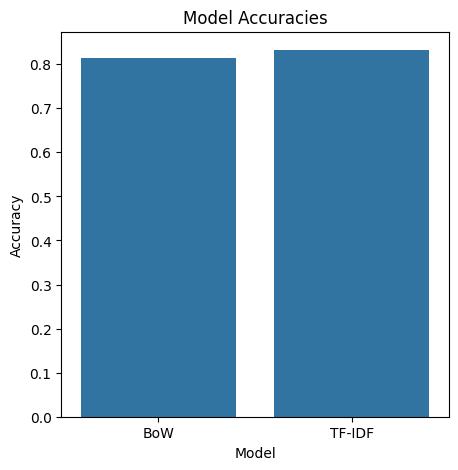

In [28]:

# Plot the accuracies of the models
accuracies = [accuracy_bow, accuracy_tfidf]
models = ['BoW', 'TF-IDF', ]

plt.figure(figsize=(5, 5))
sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


# conclusion:
comparativamente El modelo TF-IDF tiene un mejor desempeño porque pondera las palabras más importantes y evita ruido en datos redundantes o comunes. Ademas, logra capturar mejor las relaciones relevantes entre términos en los documentos.

In [29]:
# modelo predictivo
example_reviews = [
    "looking forward book came double space every paragraph kindle edition since action moves around formatting makes story hard follow die hard like want botherits sad thing good book spoiled formatting fault author story good book energy read itive also emailed author",
    "already owned book spouse forgot already part library books unfortunate amazon safeguard place notify book already library"
]

# Preprocesamos los ejemplos de reviews
cleaned_example_reviews = [preprocess_text(review) for review in example_reviews]

# Prediccion de sentimento usando BoW model
example_reviews_bow = vectorizer.transform(cleaned_example_reviews)
predicted_sentiments_bow = model_bow.predict(example_reviews_bow)

# Prediccion de sentimento usando TF-IDF model
example_reviews_tfidf = tfidf_vectorizer.transform(cleaned_example_reviews)
predicted_sentiments_tfidf = model_tfidf.predict(example_reviews_tfidf)

#  resultados
for review, pred_bow, pred_tfidf in zip(example_reviews, predicted_sentiments_bow, predicted_sentiments_tfidf):
    print(f"Review: {review}")
    print(f"Predicted Sentiment (BoW): {'Positive' if pred_bow == 1 else 'Negative'}")
    print(f"Predicted Sentiment (TF-IDF): {'Positive' if pred_tfidf == 1 else 'Negative'}")

Review: looking forward book came double space every paragraph kindle edition since action moves around formatting makes story hard follow die hard like want botherits sad thing good book spoiled formatting fault author story good book energy read itive also emailed author
Predicted Sentiment (BoW): Negative
Predicted Sentiment (TF-IDF): Positive
Review: already owned book spouse forgot already part library books unfortunate amazon safeguard place notify book already library
Predicted Sentiment (BoW): Negative
Predicted Sentiment (TF-IDF): Negative


# Otros Modelos de Clasificasion
Adicional a las metodologias anteriormente presentadas tambien se presentan el metodo del gradiente y de random forest para verificar desempeño del modelo bajo estas metodologias


In [34]:
# Division de datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) # Fit and transform on X_train
X_test_tfidf = tfidf_vectorizer.transform(X_test) # Transform X_test

# Dividir los datos en conjuntos de entrenamiento y prueba (using TF-IDF vectors):
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)


rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model using the correct TF-IDF vectors
grid_rf.fit(X_train_final, y_train_final)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   2.5s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.9s
[CV] END .....................max_depth=10, n_estimators=200; total time=   2.7s
[CV] END .....................max_depth=10, n_estimators=200; total time=   4.1s
[CV] END .....................max_depth=10, n_estimators=200; total time=   2.7s
[CV] END .....................max_depth=10, n_estimators=300; total time=   4.1s
[CV] END .....................max_depth=10, n_estimators=300; total time=   4.7s
[CV] END .....................max_depth=10, n_estimators=300; total time=   4.8s
[CV] END .....................max_depth=20, n_estimators=100; total time=   2.9s
[CV] END .....................max_depth=20, n_estimators=100; total time=   2.9s
[CV] END .....................max_depth=20, n_est

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [45]:
# Evaluar el modelo de Random Forest
rf_best = grid_rf.best_estimator_
# Use X_test_tfidf instead of X_test for prediction:
y_pred_rf = rf_best.predict(X_test_tfidf)
print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("Matris de confusion")
print(confusion_matrix(y_test, y_pred_rf))

# Evaluar el Modelo Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
# Assuming y_train_ is meant to be y_train:
gb.fit(X_train_tfidf, y_train)
y_pred_gb = gb.predict(X_test_tfidf) # Use X_test_tfidf for prediction
print("Gradient Boosting Performance")
print(classification_report(y_test, y_pred_gb))
print("Matris de confusion")
print(confusion_matrix(y_test, y_pred_gb))

Random Forest Performance
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1190
           1       0.81      0.78      0.80      1210

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400

Matris de confusion
[[974 216]
 [268 942]]
Gradient Boosting Performance
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1190
           1       0.78      0.76      0.77      1210

    accuracy                           0.77      2400
   macro avg       0.77      0.77      0.77      2400
weighted avg       0.77      0.77      0.77      2400

Matris de confusion
[[926 264]
 [290 920]]


Random Forest:
Es un modelo basado en árboles de decisión con capacidad de ajuste de hiperparámetros este obtuvo una
Precisión global: 80% y un
F1-score: 0.80 ademas muestra un mejor balance en la clasificación de ambas clases comparado con otros modelos.
Grdient Boosting:
Es un modelo avanzado que combina múltiples árboles con un enfoque iterativo. este obtuvo una
Precisión global: 77%
Ligeramente inferior a Random Forest. Usualmente
puede ser más adecuado en conjuntos de datos desbalanceados o problemas no lineales, aunque no fue superior en este caso.